In [2]:
# Import the required libraries to solve our case
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import itertools
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
from sklearn.preprocessing import LabelBinarizer


 ## Constructing ARIMA models for different variables

###  clean and reform data

In [3]:
def reform(X):   
    X['monthly_returns'] = np.log(X['price']).diff()
    X = X.dropna(axis=0).reset_index(drop=True)
    X.index = pd.to_datetime(X['date'], format='%Y%m', errors='coerce')
    X['month'] = pd.DatetimeIndex(X.index).month   
    return X

In [4]:
df_unrate = pd.read_excel("C:/VSProject/data/time_series_data_2022.xlsx",sheet_name='UNRATE', skiprows = 10)
df_cpi = pd.read_excel("C:/VSProject/data/time_series_data_2022.xlsx",sheet_name='CPIAUCSL', skiprows = 10)
df_unrate = reform(df_unrate)
df_cpi = reform(df_cpi)

In [5]:
df_gold= pd.read_excel("C:/VSProject/data/time_series_data_2022.xlsx",sheet_name='Gold prices', skiprows = 4)
df_gold['monthly_returns'] = np.log(df_gold['price']).diff()
df_gold= df_gold.dropna(axis=0).reset_index(drop=True)
df_gold.index = pd.to_datetime(df_gold['date'], format='%m/%D/%Y', errors='coerce')
df_gold.index = pd.to_datetime(df_gold.index)
df_gold['month'] = pd.DatetimeIndex(df_gold.index).month
# df_gold

In [6]:
df_sp500= pd.read_excel("C:/VSProject/data/time_series_data_2022.xlsx",sheet_name='SP500', skiprows = 7)
df_sp500.index = pd.to_datetime(df_sp500['date'], format='%Y-%m', errors='coerce')
df_sp500['year'] =  pd.DatetimeIndex(df_sp500.index).year
m = [i for i in range(1,13)]
a = []
for i in range(0,len(np.unique(df_sp500['year']))):
    a = a + m
df_sp500['month'] = a[:-3]
df_sp500['day'] = 1
df_sp500.index = pd.to_datetime(df_sp500[['year','month','day']])  
df_sp500.drop('date',axis = 1,inplace = True)
df_sp500['date'] = pd.to_datetime(df_sp500[['year','month','day']])
df_sp500['monthly_returns'] = np.log(df_sp500['price']).diff()
df_sp500.dropna(axis=0,inplace = True)
# df_sp500

### plot time-series and their Monthly Stock Returns

In [8]:
#If the variable is trending, then compute the log-first difference, 
# Δlog(yt) = log(yt) – log(yt-1),
# The log first-difference is the inflation rate for the CPIUCSL series. 
# For gold prices and stock prices, the log-first difference is the continuously compounded rate of return. 

In [9]:
df = df_gold
name = "GOLD"
plt.plot(df.index,df['price'])
plt.xlabel(name)
plt.savefig(name)


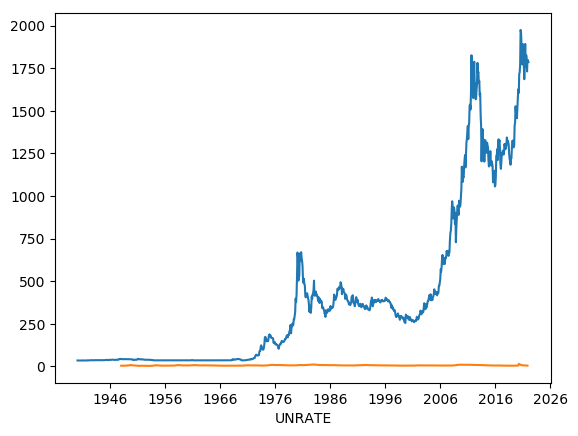

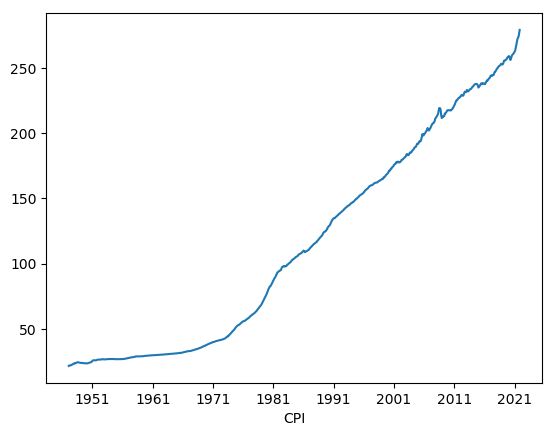

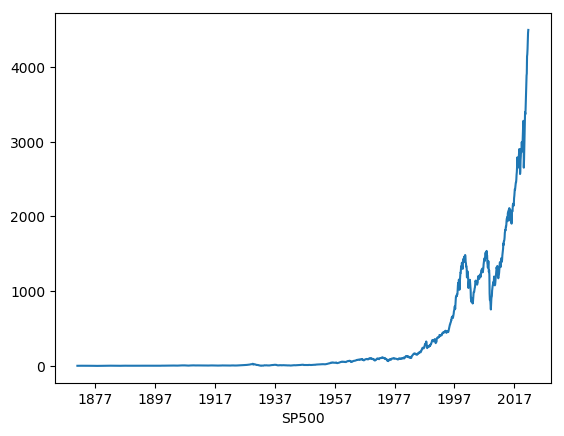

In [10]:

for df,name in zip([df_unrate,df_cpi,df_sp500],["UNRATE","CPI","SP500"]):
    plt.plot(df.index,df['price'])
    plt.xlabel(name)
    plt.savefig(name)
    plt.show()
    

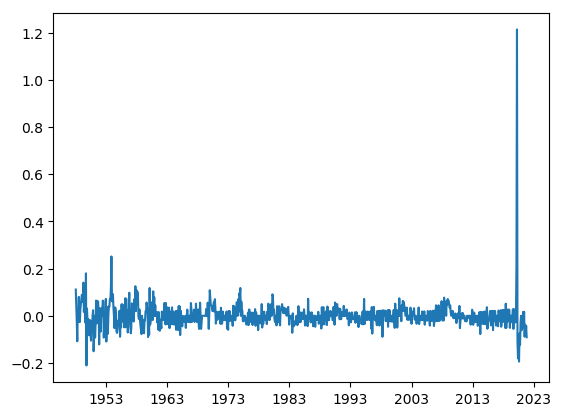

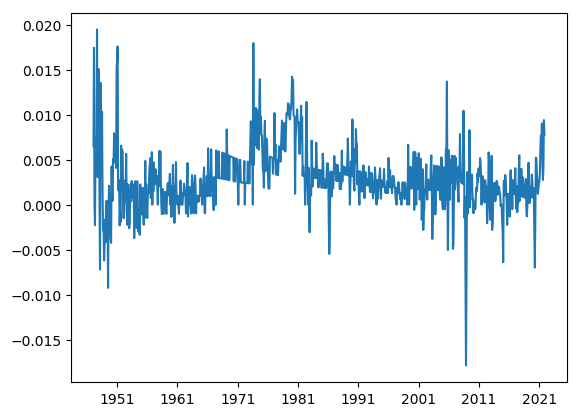

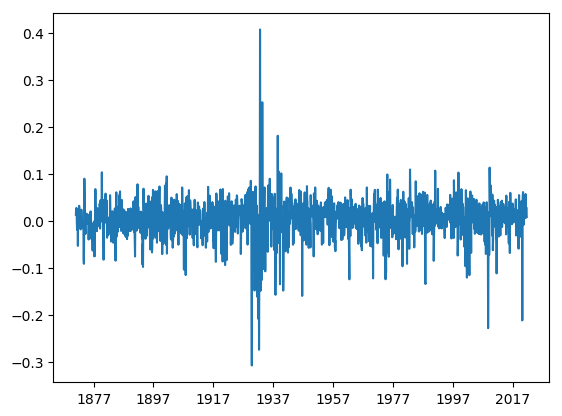

In [11]:
for df in [df_unrate,df_cpi,df_sp500]:
    plt.plot(df.index,df['monthly_returns'])
    plt.show()

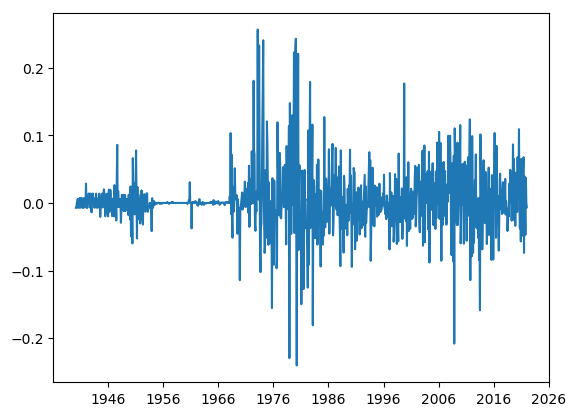

In [12]:

plt.plot(df_gold.index,df_gold['monthly_returns'])
plt.show()

### Augmented Dickey-Fuller test

In [ ]:
# To test if a variable is stationary or is non-stationary
# use ADFtest

In [7]:
#  Augmented Dickey-Fuller test for non-stationarity

def adf_test(timeseries, reg):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, regression=reg, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [34]:
# choose the best model by checking different combinations of constant and trends to be added to the regression
for df in [
        df_unrate,
        df_cpi,
        df_gold,
        df_sp500
        ]:
    adf_test(df['price'], 'c')

Results of Dickey-Fuller Test:
Test Statistic                  -3.957178
p-value                          0.001652
#Lags Used                       1.000000
Number of Observations Used    884.000000
Critical Value (1%)             -3.437769
Critical Value (5%)             -2.864815
Critical Value (10%)            -2.568514
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                   2.759112
p-value                          1.000000
#Lags Used                      15.000000
Number of Observations Used    882.000000
Critical Value (1%)             -3.437786
Critical Value (5%)             -2.864822
Critical Value (10%)            -2.568518
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                   0.519783
p-value                          0.985462
#Lags Used                      22.000000
Number of Observations Used    960.000000
Critical Value (1%)             -3.437180
Critical Value (5%)             -2.864555
Critical Value (10%)            -2.56

### Autocorrelation and Partial autocorrelation

In [13]:
# plot the ACF and PACF graph to see if the series is autocorrelated


[ 0.00354138  0.0002173  -0.00093292 -0.00182211  0.00023583  0.00077819
  0.00049308 -0.00057982 -0.00031585  0.00015562]


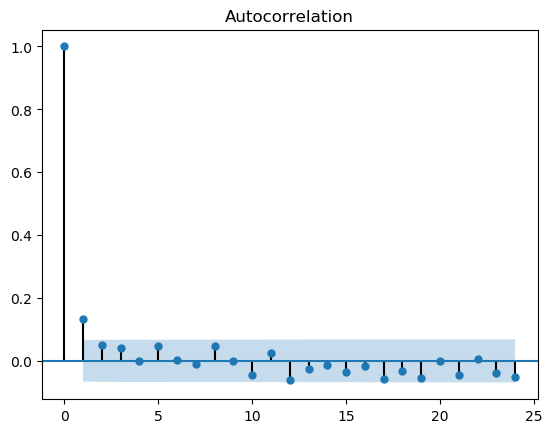

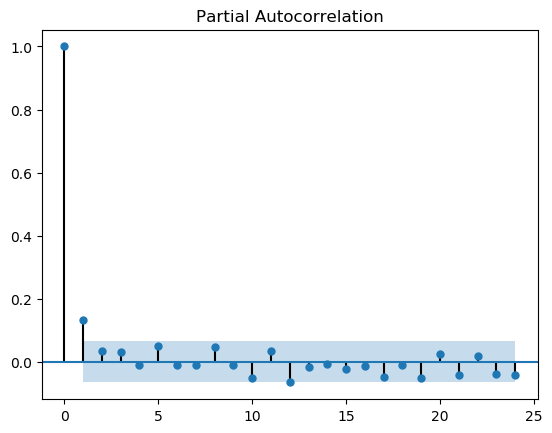

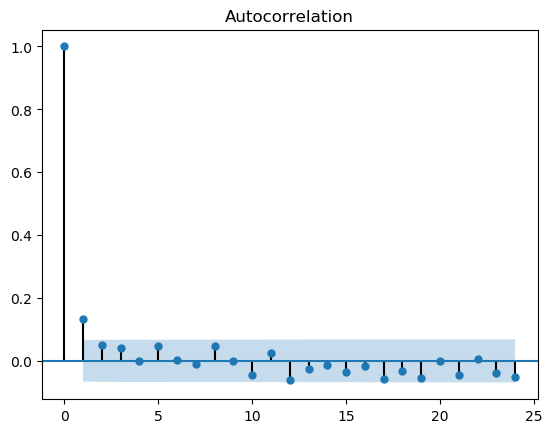

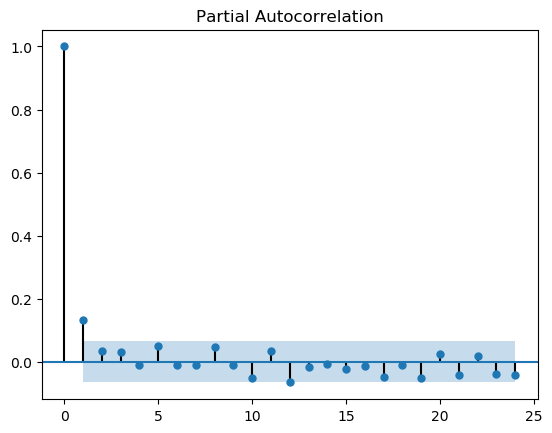

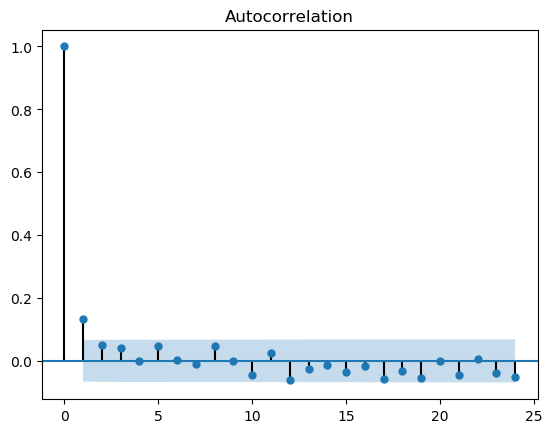

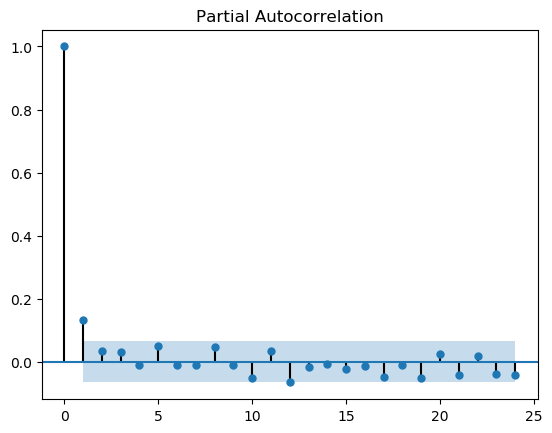

[ 4.16285722e-05 -4.27168742e-06 -9.48144336e-06 -2.29475910e-06
 -1.17154829e-05 -4.35923031e-06  1.61277185e-05 -4.50616643e-06
 -3.47605002e-07  3.43699415e-08]


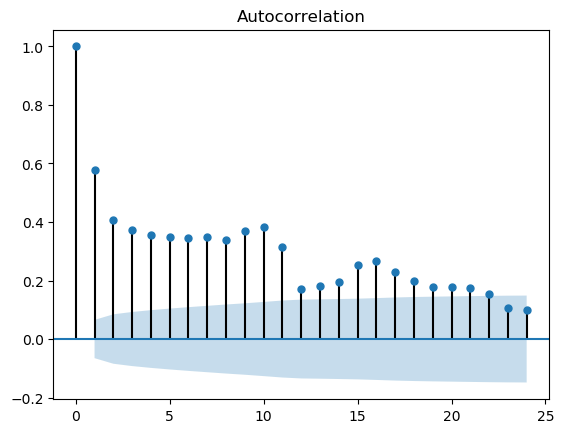

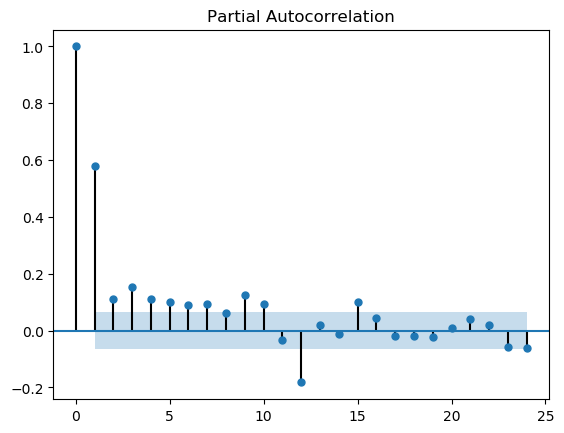

[ 3.17159490e-05  8.29338027e-07 -1.46702716e-05 -6.73349883e-06
  1.01978131e-05  4.22560367e-06 -2.13285175e-06 -9.29260651e-06
 -1.64218784e-06  3.36068723e-06]


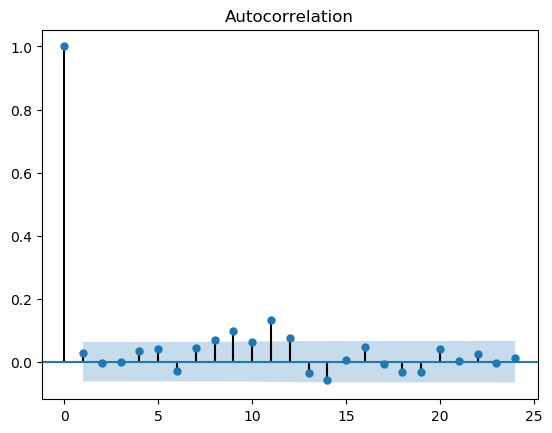

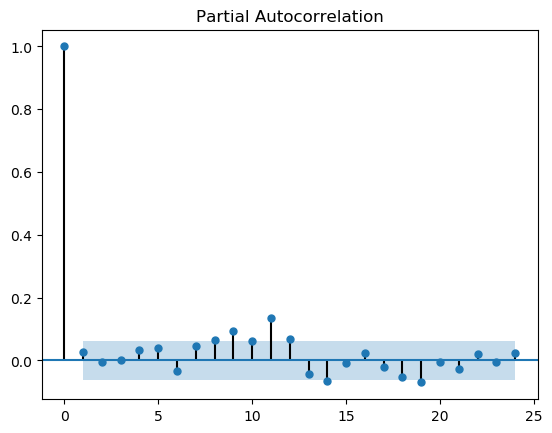

[ 5.58807880e-04  3.01515486e-05 -8.33248340e-05  8.72890966e-05
  3.19924753e-05 -1.17234622e-04 -1.01993602e-04 -9.29784724e-05
 -3.91019806e-05  5.79645078e-06]


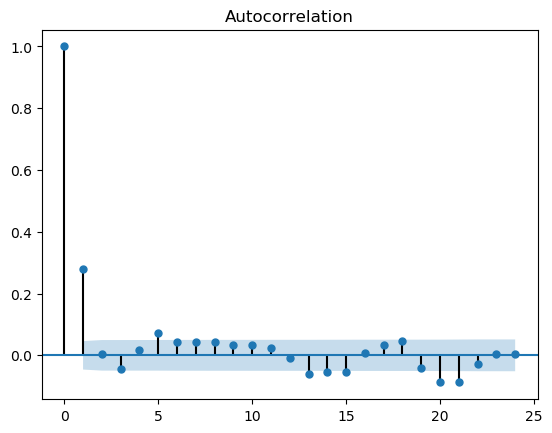

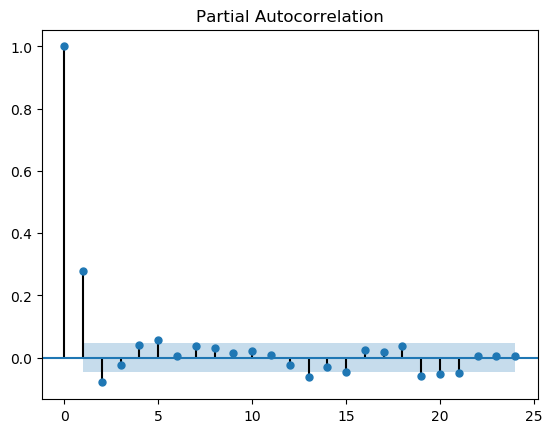

In [29]:
for df in [
        df_unrate,
        df_cpi,
        df_gold,
        df_sp500
        ]:
    #print(sm.tsa.stattools.acovf(df['price'][:10]))
    print(sm.tsa.stattools.acovf(df['monthly_returns'][:10]))

    # Plot the autocorrelation function for the first 10 lags
    #sm.graphics.tsa.plot_acf(df['price'].squeeze(), lags=10)

    
    sm.graphics.tsa.plot_acf(df['monthly_returns'].squeeze(), lags=24)

    sm.graphics.tsa.plot_pacf(df['monthly_returns'].squeeze(), lags=24)

    sm.stats.acorr_ljungbox(df['monthly_returns'], lags=[1],boxpierce=True)
    
    sm.stats.acorr_ljungbox(df['monthly_returns'], lags=[12],boxpierce=True)
    plt.show()

### Ljung-Box test

In [32]:
#Perform LBQ tests for significance of autocorrelations
from statsmodels.stats import diagnostic as diag
def box_test(df,l):
    print(f'At lag of {l}')
    print(f'X-squared = {sm.stats.acorr_ljungbox(df, lags=[l], boxpierce=True)[0][0]}')
    print(f'p-values = {sm.stats.acorr_ljungbox(df, lags=[l], boxpierce=True)[1][0]}\n')
    return sm.stats.acorr_ljungbox(df, lags=[l], boxpierce=True)[0][0],sm.stats.acorr_ljungbox(df, lags=[l], boxpierce=True)[1][0]

In [41]:
for df in [
    # df_unrate,
# df_cpi,
# df_gold,
df_sp500
]:
    box_test(df['monthly_returns'],1)
    box_test(df['monthly_returns'],12)
    box_test(df['monthly_returns'],24)

At lag of 1
X-squared = 139.97285566380253
p-values = 2.698668788538467e-32

At lag of 12
X-squared = 169.47535325019354
p-values = 6.1119031828202764e-30

At lag of 24
X-squared = 225.2427943598073
p-values = 1.2589430961867199e-34



### ARMA model

In [15]:
#For each of the variables, I estimate an ARMA forecasting model. 
# I also experiment with different lag orders for the autoregressive and moving average terms.

#### AIC and BIC

In [18]:
def AIC_PDQ(df,ar,ii,ma): 

# Define the p, d and q parameters to take any user defined value. We need to be careful with integration order, cannot be 0.    p = range(0,ar)
    p = range(0,ar)
    d = range(0,ii)
    q = range(0, ma)

# Auto-Regressive (p) -> Number of autoregressive terms.
# Integrated (d) -> Number of nonseasonal differences needed for stationarity.
# Moving Average (q) -> Number of lagged forecast errors in the prediction equation.
# Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))

# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
    ans = []
    for comb in pdq:
        try:
            mod = ARIMA(df,order=comb)
            output = mod.fit()
            ans.append([comb, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, output.aic))
        except:
            continue

    ans_df = pd.DataFrame(ans,columns=['pdq', 'aic'])
    return ans_df

In [19]:
def BIC_PDQ(df,ar,ii,ma): 

# Define the p, d and q parameters to take any user defined value. We need to be careful with integration order, cannot be 0.
    p = range(0,ar)
    d = range(0,ii)
    q = range(0, ma)

# Auto-Regressive (p) -> Number of autoregressive terms.
# Integrated (d) -> Number of nonseasonal differences needed for stationarity.
# Moving Average (q) -> Number of lagged forecast errors in the prediction equation.
# Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))

    
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best BIC value
    ans = []
    for comb in pdq:
        try:
            mod = ARIMA(df,order=comb)
            output = mod.fit()
            ans.append([comb, output.bic])
            print('ARIMA {} x {}12 : BIC Calculated ={}'.format(comb, output.bic))
        except:
            continue
            
    ans_df = pd.DataFrame(ans,columns=['pdq', 'bic'])
    return ans_df


#### unrate

In [94]:
df = df_unrate

In [16]:
train, test = df['monthly_returns'][:-60], df['monthly_returns'][-60:]
AIC_scores = AIC_PDQ(train,6,1,6)
BIC_scores = BIC_PDQ(train,6,1,6)
AIC_BIC_scores = AIC_scores.merge(BIC_scores,on = 'pdq',how='outer')
AIC_BIC_scores = AIC_BIC_scores.iloc[1:,]
AIC_BIC_scores

In [20]:
# Find models with lowest AIC and BIC criteria, corresponding to best statistical fit
minIndices = AIC_BIC_scores.apply(lambda x:(np.argmin(x)),0)
print(f'The order for best AIC = {AIC_BIC_scores.loc[minIndices.iloc[0][1]][0]} and the order for best BIC = {AIC_BIC_scores.loc[minIndices.iloc[0][2]][0]}\n')

The order for best AIC = (5, 0, 4) and the order for best BIC = (2, 0, 2)



C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


In [29]:
from numpy.linalg import LinAlgError
bestAICModelLags = AIC_BIC_scores.loc[minIndices.iloc[0][2]][0]
predictions = []
history = [i for i in train]
# Estimate model chosen by AIC
for t in range(len(test)):
    modelEstimate=ARIMA(endog = history,
                      order=bestAICModelLags
                      #trend?
                      )
    try:
        fit_= modelEstimate.fit()
    except (ValueError, LinAlgError): pass
    
    forecasted_value = fit_.forecast()

    yhat = forecasted_value[0][0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
  
    
    
# Save residuals from fitted ARMA model
#fit_= modelEstimate.fit()
#forecasted_value = fit_.forecast(steps=60)
residuals = fit_.resid

# Test for serial correlation
box_test(residuals,10)

In [34]:
#forecasted_value
forecast_actual = pd.DataFrame(test)
forecast_actual['predicted'] = predictions
forecast_actual.columns = ['actual','predicted']
forecast_actual.head()

,actual,predicted
date,,
2016-12-01,0.000000,-0.001461
2017-01-01,0.000000,-0.004654
2017-02-01,-0.021506,-0.006211
2017-03-01,-0.044452,-0.007080
2017-04-01,0.022473,-0.009158


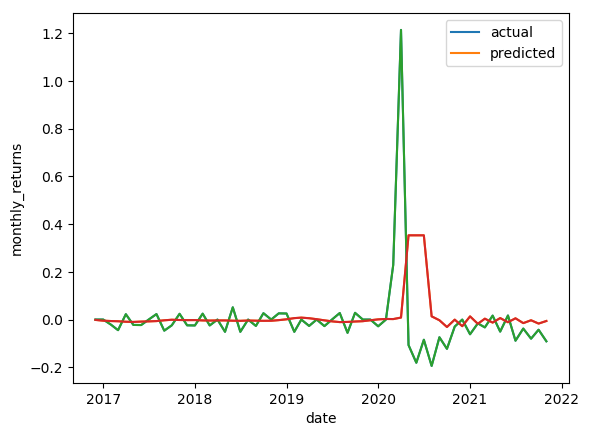

In [36]:
plt.plot(forecast_actual.index,forecast_actual['actual'])
plt.ylabel('monthly_returns')
plt.xlabel('date')
plt.plot(forecast_actual.index,forecast_actual['predicted'])
plt.legend(('actual','predicted'))
plt.show()

#### CPI

In [97]:
df = df_cpi

In [98]:
train, test = df['monthly_returns'][:-60], df['monthly_returns'][-60:]
AIC_scores = AIC_PDQ(train,6,1,6)
BIC_scores = BIC_PDQ(train,6,1,6)
AIC_BIC_scores = AIC_scores.merge(BIC_scores,on = 'pdq',how='outer')
AIC_BIC_scores = AIC_BIC_scores.iloc[1:,]
AIC_BIC_scores
# Find models with lowest AIC and BIC criteria, corresponding to best statistical fit
minIndices = AIC_BIC_scores.apply(lambda x:(np.argmin(x)),0)
print(f'The order for best AIC = {AIC_BIC_scores.loc[minIndices.iloc[0][1]][0]} and the order for best BIC = {AIC_BIC_scores.loc[minIndices.iloc[0][2]][0]}\n')


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tupl

The order for best AIC = (4, 0, 4) and the order for best BIC = (1, 0, 2)



C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


In [ ]:
from numpy.linalg import LinAlgError
bestAICModelLags = AIC_BIC_scores.loc[minIndices.iloc[0][2]][0]
predictions = []
history = [i for i in train]
# Estimate model chosen by AIC
for t in range(len(test)):
    modelEstimate=ARIMA(endog = history,
                      order=bestAICModelLags
                      #trend?
                      )
    try:
        fit_= modelEstimate.fit()
    except (ValueError, LinAlgError): pass
    
    forecasted_value = fit_.forecast()

    yhat = forecasted_value[0][0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
  
    
    
# Save residuals from fitted ARMA model
#fit_= modelEstimate.fit()
#forecasted_value = fit_.forecast(steps=60)
residuals = fit_.resid

# Test for serial correlation
box_test(residuals,10)
forecast_actual = pd.DataFrame(test)
forecast_actual['predicted'] = predictions
forecast_actual.columns = ['actual','predicted']
forecast_actual.head()

In [ ]:
print(f'The order for best AIC = {AIC_BIC_scores.loc[minIndices.iloc[0][1]][0]} and the order for best BIC = {AIC_BIC_scores.loc[minIndices.iloc[0][2]][0]}\n')
from numpy.linalg import LinAlgError
bestAICModelLags = AIC_BIC_scores.loc[minIndices.iloc[0][2]][0]
predictions = []
history = [i for i in train]
# Estimate model chosen by AIC
for t in range(len(test)):
    modelEstimate=ARIMA(endog = history,
                      order=bestAICModelLags
                      #trend?
                      )
    try:
        fit_= modelEstimate.fit()
    except (ValueError, LinAlgError): pass
    
    forecasted_value = fit_.forecast()

    yhat = forecasted_value[0][0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
  
    
    
# Save residuals from fitted ARMA model
#fit_= modelEstimate.fit()
#forecasted_value = fit_.forecast(steps=60)
residuals = fit_.resid

# Test for serial correlation
box_test(residuals,10)
forecast_actual = pd.DataFrame(test)
forecast_actual['predicted'] = predictions
forecast_actual.columns = ['actual','predicted']
forecast_actual.head()

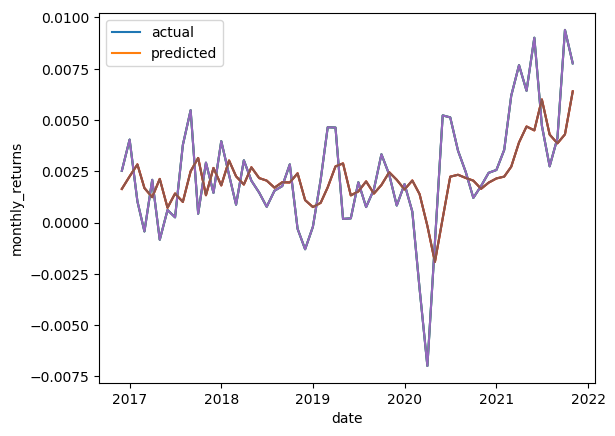

In [81]:
plt.plot(forecast_actual.index,forecast_actual['actual'])
plt.ylabel('monthly_returns')
plt.xlabel('date')
plt.plot(forecast_actual.index,forecast_actual['predicted'])
plt.legend(('actual','predicted'))
plt.show()


#### gold

In [20]:
df = df_gold
train, test = df['monthly_returns'][:-60], df['monthly_returns'][-60:]
AIC_scores = AIC_PDQ(train,4,2,4)
BIC_scores = BIC_PDQ(train,4,2,4)
AIC_BIC_scores = AIC_scores.merge(BIC_scores,on = 'pdq',how='outer')
AIC_BIC_scores = AIC_BIC_scores.iloc[1:,]
AIC_BIC_scores


C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple

,pdq,aic,bic
1,"(0, 0, 1)",-3043.130356,-3028.647468
2,"(0, 0, 2)",-3041.130662,-3021.820145
3,"(0, 0, 3)",-3039.130725,-3014.992579
4,"(0, 1, 0)",-2430.790243,-2421.137153
5,"(0, 1, 1)",-3033.040909,-3018.561273
6,"(0, 1, 2)",-3031.308611,-3012.002430
7,"(1, 0, 0)",-3043.128287,-3028.645400
8,"(1, 0, 1)",-3041.130647,-3021.820130
9,"(1, 1, 0)",-2674.459331,-2659.979695
10,"(1, 1, 1)",-3031.300502,-3011.994321


In [21]:

# Find models with lowest AIC and BIC criteria, corresponding to best statistical fit
minIndices = AIC_BIC_scores.apply(lambda x:(np.argmin(x)),0)
print(f'The order for best AIC = {AIC_BIC_scores.loc[minIndices.iloc[0][1]][0]} and the order for best BIC = {AIC_BIC_scores.loc[minIndices.iloc[0][2]][0]}\n')


The order for best AIC = (3, 0, 2) and the order for best BIC = (0, 0, 1)



C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


In [22]:
from numpy.linalg import LinAlgError
bestAICModelLags = AIC_BIC_scores.loc[minIndices.iloc[0][2]][0]
bestAICModelLags

(0, 0, 1)

In [23]:
predictions = []
history = [i for i in train]
# Estimate model chosen by AIC
for t in range(len(test)):
    modelEstimate=ARIMA(endog = history,
                      order=bestAICModelLags
                      #trend?
                      )
    try:
        fit_= modelEstimate.fit()
    except (ValueError, LinAlgError): pass
    
    forecasted_value = fit_.forecast()

    yhat = forecasted_value[0][0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
  


At lag of 10
X-squared = 21.61945534742703
p-values = 0.017165058626546756



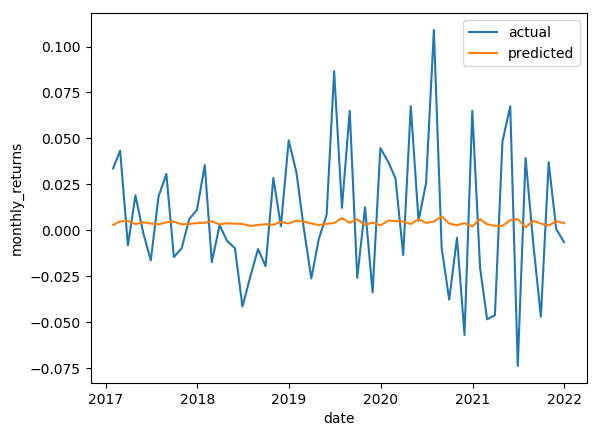

In [24]:
    
    
# Save residuals from fitted ARMA model
#fit_= modelEstimate.fit()
#forecasted_value = fit_.forecast(steps=60)
residuals = fit_.resid

# Test for serial correlation
box_test(residuals,10)
forecast_actual = pd.DataFrame(test)
forecast_actual['predicted'] = predictions
forecast_actual.columns = ['actual','predicted']
plt.plot(forecast_actual.index,forecast_actual['actual'])
plt.ylabel('monthly_returns')
plt.xlabel('date')
plt.plot(forecast_actual.index,forecast_actual['predicted'])
plt.legend(('actual','predicted'))
plt.show()

#### S&P500

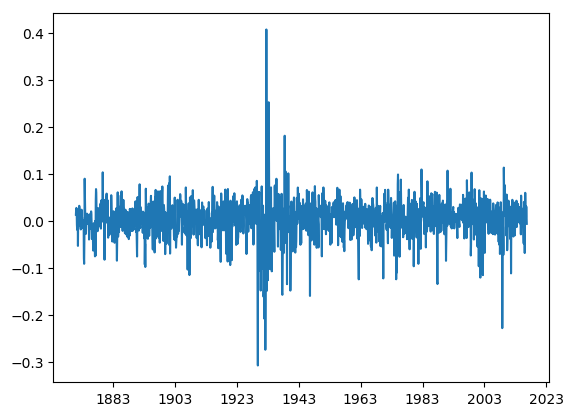

In [201]:
df = df_sp500
train, test = df['monthly_returns'][:-60], df['monthly_returns'][-60:]
plt.plot(train)
plt.show()

In [202]:
AIC_scores = AIC_PDQ(train,6,1,6)
BIC_scores = BIC_PDQ(train,6,1,6)
AIC_BIC_scores = AIC_scores.merge(BIC_scores,on = 'pdq',how='outer')
AIC_BIC_scores = AIC_BIC_scores.iloc[1:,]
AIC_BIC_scores

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tupl

,pdq,aic,bic
1,"(0, 0, 1)",-6382.678925,-6366.280243
2,"(0, 0, 2)",-6382.597216,-6360.732305
3,"(0, 0, 3)",-6383.838918,-6356.507780
4,"(0, 0, 4)",-6382.224200,-6349.426835
5,"(0, 0, 5)",-6386.942800,-6348.679207
6,"(1, 0, 0)",-6374.741085,-6358.342403
7,"(1, 0, 1)",-6382.110392,-6360.245482
8,"(2, 0, 0)",-6384.467407,-6362.602497
9,"(2, 0, 1)",-6382.800367,-6355.469229
10,"(3, 0, 0)",-6383.226737,-6355.895599


In [203]:
# Find models with lowest AIC and BIC criteria, corresponding to best statistical fit
minIndices = AIC_BIC_scores.apply(lambda x:(np.argmin(x)),0)
print(f'The order for best AIC = {AIC_BIC_scores.loc[minIndices.iloc[0][1]][0]} and the order for best BIC = {AIC_BIC_scores.loc[minIndices.iloc[0][2]][0]}\n')


The order for best AIC = (5, 0, 4) and the order for best BIC = (0, 0, 1)



C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


In [204]:
from numpy.linalg import LinAlgError
bestAICModelLags = AIC_BIC_scores.loc[minIndices.iloc[0][2]][0]
predictions = []
history = [i for i in train]
# Estimate model chosen by AIC
for t in range(len(test)):
    modelEstimate=ARIMA(endog = history,
                      order=bestAICModelLags
                      #trend?
                      )
    try:
        fit_= modelEstimate.fit()
    except (ValueError, LinAlgError): pass
    
    forecasted_value = fit_.forecast()

    yhat = forecasted_value[0][0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
  
    
    
# Save residuals from fitted ARMA model
#fit_= modelEstimate.fit()
#forecasted_value = fit_.forecast(steps=60)
residuals = fit_.resid



In [205]:
# Test for serial correlation
box_test(residuals,10)
forecast_actual = pd.DataFrame(test)
forecast_actual['predicted'] = predictions
forecast_actual.columns = ['actual','predicted']
forecast_actual


At lag of 10
X-squared = 19.185191093797226
p-values = 0.037972553687921656



,actual,predicted
2016-10-01,-0.006822,0.000741
2016-11-01,0.010200,0.001303
2016-12-01,0.037016,0.006162
2017-01-01,0.012601,0.012661
2017-02-01,0.023797,0.003544
2017-03-01,0.015718,0.009549
2017-04-01,-0.003178,0.005401
2017-05-01,0.015160,0.001045
2017-06-01,0.016003,0.007748
2017-07-01,0.008228,0.006026


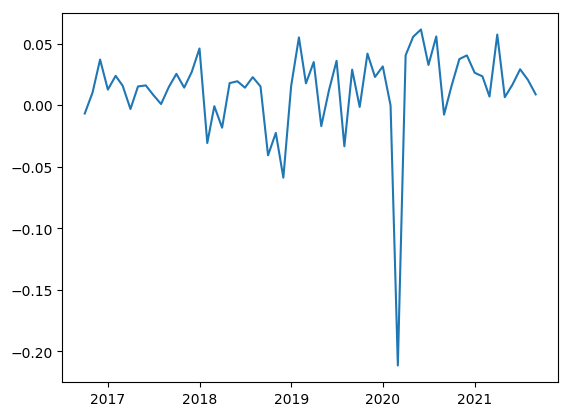

In [206]:
forecast_actual
plt.plot(forecast_actual.index,forecast_actual['actual'])
plt.show()

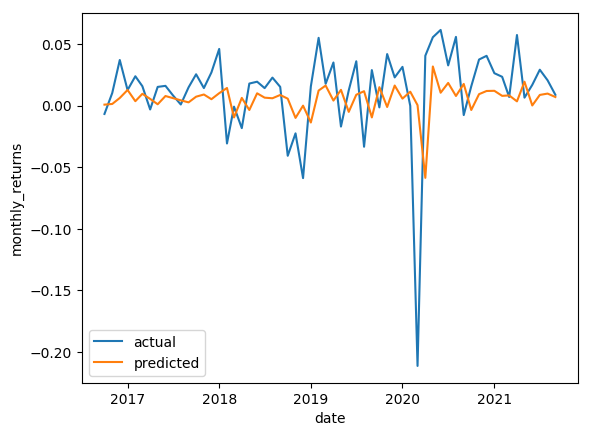

In [207]:
forecast_actual.columns = ['actual','predicted']
plt.plot(forecast_actual.index,forecast_actual['actual'])
plt.ylabel('monthly_returns')
plt.xlabel('date')
plt.plot(forecast_actual.index,forecast_actual['predicted'])
plt.legend(('actual','predicted'))
plt.show()

## Part II. Modeling Trend and Seasonality

In [208]:
df = pd.read_csv("C:/VSProject/data/Keeling_CO2_data_2022-1.csv").rename(
    columns = {"CO2_ppm":"co2","Yr":"year"})
df.head()


,year,month,co2
0,1964,5,322.25
1,1964,6,321.89
2,1964,7,320.44
3,1964,8,318.69
4,1964,9,316.71


In [209]:
df['day'] = 1
df.index = pd.to_datetime(df[['year','month','day']])
df.head()

,year,month,co2,day
1964-05-01,1964,5,322.25,1
1964-06-01,1964,6,321.89,1
1964-07-01,1964,7,320.44,1
1964-08-01,1964,8,318.69,1
1964-09-01,1964,9,316.71,1


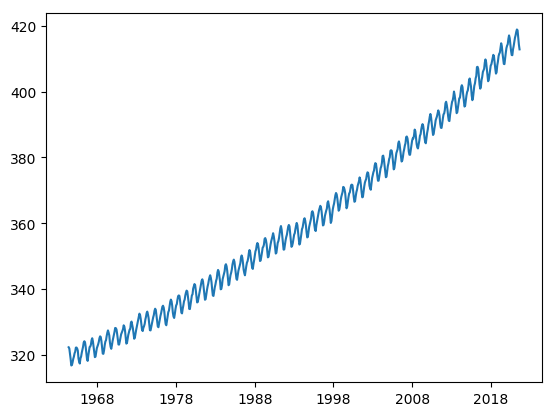

In [35]:
plt.plot(df.index,df['co2'])
plt.show()

In [210]:
df2009 = df[df['year']<2010]

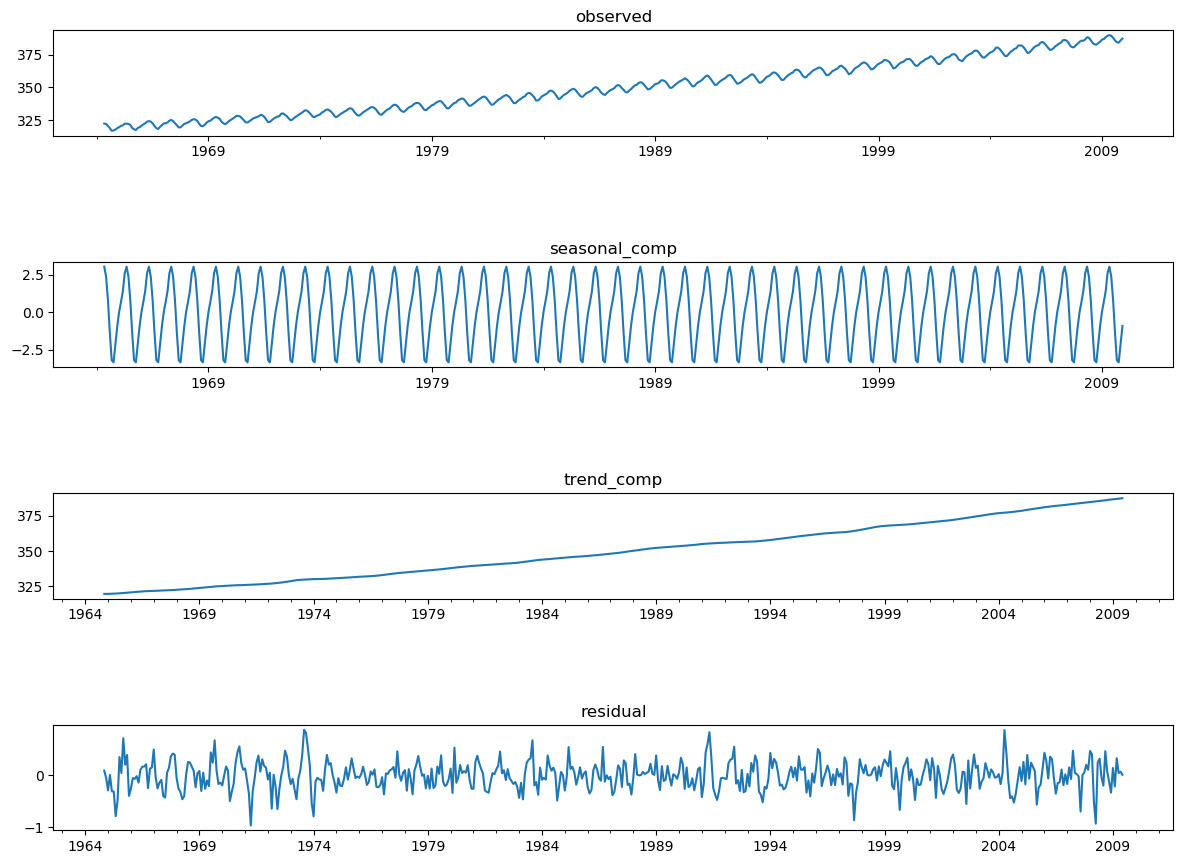

In [40]:
# Decompose the time series data into the observed value, seasonal, trend and residual components  
# change the model parameter to toggle between multiplicative and additive seasonality
decomposed_series = sm.tsa.seasonal_decompose(df2009['co2'], model='additive')

observed = decomposed_series.observed
seasonal_comp = decomposed_series.seasonal
trend_comp = decomposed_series.trend
residual = decomposed_series.resid

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(14,10))
observed.plot(ax=ax1)
seasonal_comp.plot(ax=ax2)
trend_comp.plot(ax=ax3)
residual.plot(ax=ax4)

ax1.title.set_text('observed')
ax2.title.set_text('seasonal_comp')
ax3.title.set_text('trend_comp')
ax4.title.set_text('residual')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.8, 
                    hspace=1.2)
plt.show()

### Linear Regression with dummy variables

In [41]:
def feature_transform(data):
    encoding = LabelBinarizer().fit_transform(data)
    feature = []
    for i in range(len(encoding)):
        a = list(encoding[i])
        a.pop(0)
        inp = [1]
        inp = inp + a
        feature.append(inp)
    return feature

month_feature = feature_transform([m for m in df2009['month']])

In [215]:
month_feature

[[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 0,

In [44]:
linear_regression = sm.OLS(df2009['co2'].tolist(), month_feature).fit()
linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.4599
Date:                Fri, 14 Jan 2022   Prob (F-statistic):              0.927
Time:                        15:37:27   Log-Likelihood:                -2420.5
No. Observations:                 548   AIC:                             4865.
Df Residuals:                     536   BIC:                             4917.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        349.5502      3.022    115.678      0.000     343.614     355.486
x1             0.7904      4.273      0.185      0.853      -7.604       9.185
x2             1.6251      4.273      0.380      0.704      -6.770      10.020
x3             2.9407      4.273      0.688      0.492      -5.454      11.335
x4             2.8296      4.250      0.666      0.506      -5.519      11.178
x5             2.2828      4.250      0.537      0.591      -6.066      10.632
x6             0.8372      4.250      0.197      0.844      -7.512       9.186
x7            -1.1628      4.250     -0.274      0.784      -9.512       7.186
x8            -2.8628      4.250     -0.674      0.501     -11.212       5.486
x9            -2.8770      4.250     -0.677      0.499     -11.226       5.472
x10           -1.5159      4.250     -0.357      0.721      -9.865       6.833
x11           -0.2133      4.250     -0.050      0.960      -8.562       8.136
==============================================================================
Omnibus:                      235.712   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.854
Skew:                           0.220   Prob(JB):                     4.45e-08
Kurtosis:                       1.865   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear, Quadratic and Exponential trends for co2

In [211]:
def linear_trend_feat(data_len):
    inp_final = []
    for i in range(data_len):
        inp = [1]
        inp.append(i+1)
        inp_final.append(inp)
    return inp_final

def quadratic_trend_feat(data_len):
    inp_final = []
    for i in range(data_len):
        inp = [1]
        inp.append(i+1)
        inp.append((i+1)**2)
        inp_final.append(inp)
    return inp_final

input_lin_trend = linear_trend_feat(df2009.shape[0])
input_quad_trend = quadratic_trend_feat(df2009.shape[0])

In [213]:
input_quad_trend

[[1, 1, 1],
 [1, 2, 4],
 [1, 3, 9],
 [1, 4, 16],
 [1, 5, 25],
 [1, 6, 36],
 [1, 7, 49],
 [1, 8, 64],
 [1, 9, 81],
 [1, 10, 100],
 [1, 11, 121],
 [1, 12, 144],
 [1, 13, 169],
 [1, 14, 196],
 [1, 15, 225],
 [1, 16, 256],
 [1, 17, 289],
 [1, 18, 324],
 [1, 19, 361],
 [1, 20, 400],
 [1, 21, 441],
 [1, 22, 484],
 [1, 23, 529],
 [1, 24, 576],
 [1, 25, 625],
 [1, 26, 676],
 [1, 27, 729],
 [1, 28, 784],
 [1, 29, 841],
 [1, 30, 900],
 [1, 31, 961],
 [1, 32, 1024],
 [1, 33, 1089],
 [1, 34, 1156],
 [1, 35, 1225],
 [1, 36, 1296],
 [1, 37, 1369],
 [1, 38, 1444],
 [1, 39, 1521],
 [1, 40, 1600],
 [1, 41, 1681],
 [1, 42, 1764],
 [1, 43, 1849],
 [1, 44, 1936],
 [1, 45, 2025],
 [1, 46, 2116],
 [1, 47, 2209],
 [1, 48, 2304],
 [1, 49, 2401],
 [1, 50, 2500],
 [1, 51, 2601],
 [1, 52, 2704],
 [1, 53, 2809],
 [1, 54, 2916],
 [1, 55, 3025],
 [1, 56, 3136],
 [1, 57, 3249],
 [1, 58, 3364],
 [1, 59, 3481],
 [1, 60, 3600],
 [1, 61, 3721],
 [1, 62, 3844],
 [1, 63, 3969],
 [1, 64, 4096],
 [1, 65, 4225],
 [1, 66, 435

                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 2.944e+04
Date:                Fri, 14 Jan 2022   Prob (F-statistic):               0.00
Time:                        15:47:29   Log-Likelihood:                -1325.5
No. Observations:                 548   AIC:                             2655.
Df Residuals:                     546   BIC:                             2664.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        315.1342      0.233   1352.845      0.0

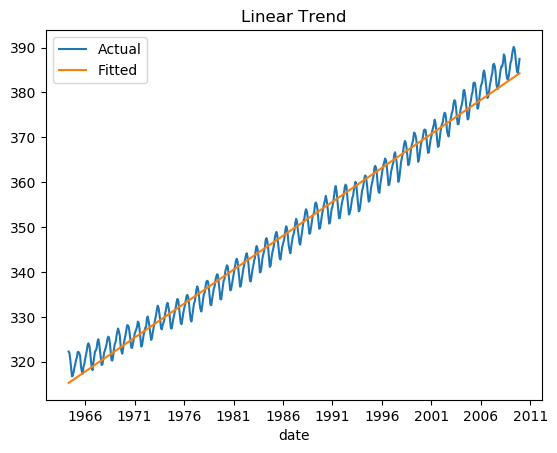

In [57]:
lin_trend_model = sm.OLS(df2009['co2'], input_lin_trend).fit()
print(lin_trend_model.summary())
plt.plot(df2009.index,df2009['co2'])
plt.xlabel('date')
plt.plot(df2009.index,lin_trend_model.fittedvalues)
plt.legend(('Actual','Fitted'))
plt.title('Linear Trend')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.291e+04
Date:                Fri, 14 Jan 2022   Prob (F-statistic):               0.00
Time:                        15:49:16   Log-Likelihood:                -1205.6
No. Observations:                 548   AIC:                             2417.
Df Residuals:                     545   BIC:                             2430.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        318.7713      0.282   1131.677      0.0

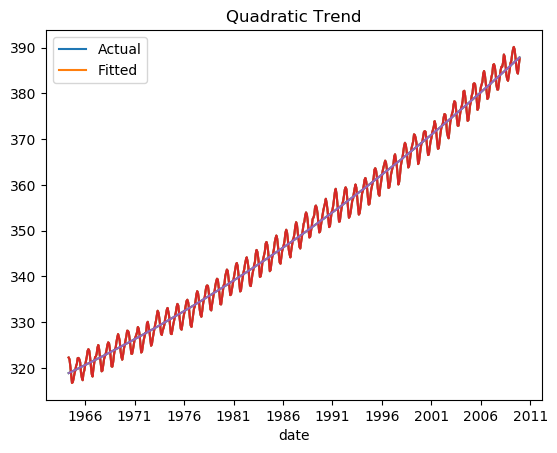

In [60]:
quad_trend_model = sm.OLS(df2009['co2'], input_quad_trend).fit()
print(quad_trend_model.summary())
plt.plot(df2009.index,df2009['co2'])
plt.xlabel('date')
plt.plot(df2009.index,quad_trend_model.fittedvalues)
plt.legend(('Actual','Fitted'))
plt.title('Quadratic Trend')
plt.show()